In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from IPython.display import Image, display
from scipy import stats
from scipy.stats import skew

In [6]:
os.chdir(r"C:\Users\amash\disease-risk\reports\figures\after_preprocessed")

In [7]:
#Import preprocessed dataset
df = pd.read_csv(r"C:\Users\amash\disease-risk\data\processed\preprocessed_data.csv")
df.head()

,age,gender,height,weight,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,target
0,56,Male,173.416872,56.886640,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,...,Poor,No,High,5,No,Yes,0,1.0,5.5,healthy
1,69,Female,163.207380,97.799859,85.598889,117.917986,66.463696,120.081375,116.905134,10.131597,...,Moderate,No,High,5,Yes,No,0,1.0,5.5,healthy
2,46,Male,177.281966,80.687562,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,...,Good,Yes,High,4,No,No,0,1.0,5.5,healthy
3,32,Female,172.101255,63.142868,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,...,Moderate,No,High,1,No,Yes,0,1.0,5.5,healthy
4,60,Female,163.608816,40.000000,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,...,Moderate,Yes,High,1,Yes,Yes,0,1.0,5.5,healthy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  int64  
 1   gender                    100000 non-null  object 
 2   height                    100000 non-null  float64
 3   weight                    100000 non-null  float64
 4   waist_size                100000 non-null  float64
 5   blood_pressure            100000 non-null  float64
 6   heart_rate                100000 non-null  float64
 7   cholesterol               100000 non-null  float64
 8   glucose                   100000 non-null  float64
 9   insulin                   100000 non-null  float64
 10  sleep_hours               100000 non-null  float64
 11  sleep_quality             100000 non-null  object 
 12  work_hours                100000 non-null  float64
 13  physical_activity         100000 non-null  fl

In [9]:
#Identify numerical and categorical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Numeric columns ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")



Numeric columns (24): ['age', 'height', 'weight', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']
Categorical columns (15): ['gender', 'sleep_quality', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner', 'target']


In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} categories")


gender: 2 categories
sleep_quality: 4 categories
smoking_level: 3 categories
mental_health_support: 2 categories
education_level: 4 categories
job_type: 6 categories
occupation: 6 categories
diet_type: 4 categories
device_usage: 3 categories
healthcare_access: 3 categories
insurance: 2 categories
sunlight_exposure: 3 categories
family_history: 2 categories
pet_owner: 2 categories
target: 2 categories


In [13]:
#Encode categorical variables

label_mappings = {}

df_encoded = df.copy()

categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns

print(f"Found {len(categorical_columns)} categorical columns:")

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoded {col}: {label_mappings[col]}")

encoded_file_path = 'reports/figures/after_preprocessed/encoded_dataset.csv'
os.makedirs(os.path.dirname(encoded_file_path), exist_ok=True)
df_encoded.to_csv(encoded_file_path, index=False)
print(f"\nEncoded dataset saved to: {encoded_file_path}")

mappings_file_path = 'label_mappings.csv'
mappings_data = []
for column, mapping in label_mappings.items():
    for label, encoded_value in mapping.items():
        mappings_data.append({
            'Column': column,
            'Original_Label': label,
            'Encoded_Value': encoded_value
        })

mappings_df = pd.DataFrame(mappings_data)
mappings_df.to_csv(mappings_file_path, index=False)
print(f"Label mappings saved to: {mappings_file_path}")

Found 15 categorical columns:
Encoded gender: {'Female': 0, 'Male': 1}
Encoded sleep_quality: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3}
Encoded smoking_level: {'Heavy': 0, 'Light': 1, 'Non-smoker': 2}
Encoded mental_health_support: {'No': 0, 'Yes': 1}
Encoded education_level: {'Bachelor': 0, 'High School': 1, 'Master': 2, 'PhD': 3}
Encoded job_type: {'Healthcare': 0, 'Labor': 1, 'Office': 2, 'Service': 3, 'Tech': 4, 'Unemployed': 5}
Encoded occupation: {'Artist': 0, 'Doctor': 1, 'Driver': 2, 'Engineer': 3, 'Farmer': 4, 'Teacher': 5}
Encoded diet_type: {'Keto': 0, 'Omnivore': 1, 'Vegan': 2, 'Vegetarian': 3}
Encoded device_usage: {'High': 0, 'Low': 1, 'Moderate': 2}
Encoded healthcare_access: {'Good': 0, 'Moderate': 1, 'Poor': 2}
Encoded insurance: {'No': 0, 'Yes': 1}
Encoded sunlight_exposure: {'High': 0, 'Low': 1, 'Moderate': 2}
Encoded family_history: {'No': 0, 'Yes': 1}
Encoded pet_owner: {'No': 0, 'Yes': 1}
Encoded target: {'diseased': 0, 'healthy': 1}

Encoded dataset saved

In [14]:
#Rounding off numerical variables to 3 decimal places
def round_numerical_variables (df, decimal_places=3):
    df_rounded = df.copy()
    numerical_columns = df_rounded.select_dtypes (include=[np.number]).columns
    df_rounded [numerical_columns] = df_rounded [numerical_columns].round(decimal_places)
    print (f"All numerical variables rounded to {decimal_places} decimal places")
    return df_rounded

df_encoded_rounded = round_numerical_variables (df_encoded, decimal_places=3)

# Save the rounded encoded dataset
rounded_file_path = 'encoded_dataset_rounded.csv'
df_encoded_rounded.to_csv(rounded_file_path, index=False)
print (f"\nRounded encoded dataset saved to: {rounded_file_path}")


All numerical variables rounded to 3 decimal places

Rounded encoded dataset saved to: encoded_dataset_rounded.csv


In [18]:
# Calculate imbalance ratio
class_counts = df_encoded_rounded['target'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.3f}")

if imbalance_ratio == 1:
    print("The dataset is perfectly balanced.")
elif imbalance_ratio <= 2:
    print("The dataset is moderately balanced.")
elif imbalance_ratio <= 5:
    print("The dataset is moderately imbalanced.")
else:
    print("The dataset is highly imbalanced.")


Imbalance Ratio: 2.344
The dataset is moderately imbalanced.


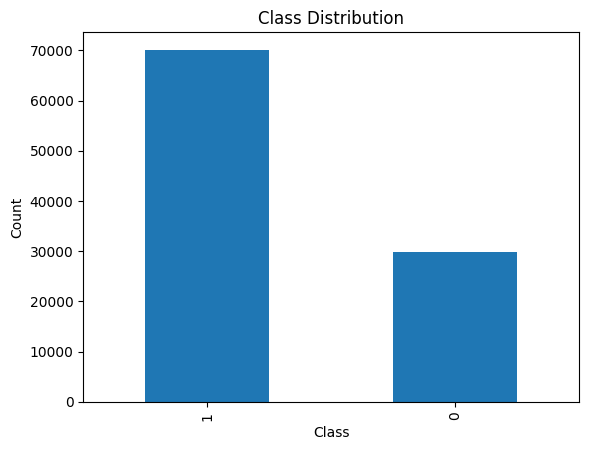

In [20]:
#Visually representing class imbalance
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



==================== CORRELATION MATRIX (with all features) ====================


,age,gender,height,weight,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,target
age,1.000,0.000,-0.007,0.003,-0.006,0.005,-0.005,0.006,-0.001,-0.001,0.002,0.001,0.002,-0.003,0.001,-0.003,-0.001,0.003,0.003,-0.006,0.001,0.002,0.006,0.004,-0.006,0.002,0.002,-0.000,0.000,-0.000,-0.003,-0.003,-0.002,0.001,0.002,nan,nan,nan,-0.007
gender,0.000,1.000,0.002,-0.005,0.004,-0.001,0.002,-0.001,-0.004,-0.002,0.003,-0.005,-0.001,0.001,-0.004,0.003,-0.003,0.001,-0.003,0.003,0.005,-0.000,-0.003,0.002,-0.001,0.003,-0.000,0.003,0.001,-0.001,-0.001,0.004,0.007,0.003,-0.004,nan,nan,nan,0.001
height,-0.007,0.002,1.000,-0.003,0.001,0.001,-0.006,0.001,-0.003,-0.003,-0.009,-0.001,-0.001,-0.005,0.002,-0.004,-0.004,0.002,0.006,-0.003,-0.006,0.001,-0.000,-0.001,-0.002,-0.002,-0.006,-0.003,0.005,-0.004,-0.005,-0.005,0.002,-0.003,0.000,nan,nan,nan,0.001
weight,0.003,-0.005,-0.003,1.000,0.005,0.003,-0.002,-0.000,0.002,0.003,0.005,-0.001,-0.005,0.002,-0.005,0.004,0.003,0.000,0.006,0.000,0.000,-0.005,-0.001,-0.002,0.002,-0.000,0.003,-0.001,0.002,0.003,0.001,0.001,-0.004,-0.003,0.004,nan,nan,nan,-0.002
waist_size,-0.006,0.004,0.001,0.005,1.000,0.002,0.002,-0.001,-0.002,-0.007,-0.000,-0.005,0.003,0.003,0.002,-0.001,0.000,0.005,-0.004,-0.003,-0.000,-0.001,0.000,0.003,-0.001,-0.001,0.004,-0.004,-0.005,0.007,0.005,0.004,-0.003,-0.003,-0.002,nan,nan,nan,-0.000
blood_pressure,0.005,-0.001,0.001,0.003,0.002,1.000,-0.002,0.001,0.003,0.004,0.000,0.004,0.004,-0.001,-0.001,0.001,-0.007,0.004,0.001,0.006,-0.002,-0.001,0.005,0.004,-0.001,-0.000,-0.003,-0.003,0.001,0.003,0.001,0.002,0.001,-0.001,-0.001,nan,nan,nan,0.003
heart_rate,-0.005,0.002,-0.006,-0.002,0.002,-0.002,1.000,-0.001,-0.001,0.000,-0.003,0.002,-0.003,0.002,-0.006,0.005,0.000,0.002,0.001,0.002,-0.002,0.004,-0.001,-0.004,0.002,-0.001,-0.002,-0.000,0.005,-0.001,-0.002,0.002,-0.001,0.003,0.006,nan,nan,nan,0.000
cholesterol,0.006,-0.001,0.001,-0.000,-0.001,0.001,-0.001,1.000,-0.003,0.006,-0.002,-0.001,0.003,-0.002,-0.001,-0.002,-0.001,-0.007,0.005,-0.000,-0.000,0.000,0.005,0.005,-0.003,-0.000,0.003,0.000,-0.001,-0.003,-0.001,0.001,-0.002,0.004,0.003,nan,nan,nan,-0.001
glucose,-0.001,-0.004,-0.003,0.002,-0.002,0.003,-0.001,-0.003,1.000,-0.002,-0.004,0.002,-0.003,0.004,-0.000,-0.006,-0.001,-0.000,0.002,-0.001,0.001,-0.006,-0.001,-0.003,-0.001,-0.006,-0.002,-0.000,-0.004,0.006,-0.000,-0.001,0.001,0.002,-0.004,nan,nan,nan,-0.001
insulin,-0.001,-0.002,-0.003,0.003,-0.007,0.004,0.000,0.006,-0.002,1.000,0.000,0.001,-0.001,0.001,-0.000,0.004,0.002,0.001,0.002,-0.005,-0.004,0.001,0.005,-0.002,0.000,-0.004,0.002,0.002,0.000,-0.003,0.003,0.001,-0.002,-0.003,-0.002,nan,nan,nan,-0.000



 ALL CORRELATIONS WITH TARGET VARIABLE 


,target
target,1.000
work_hours,0.011
daily_steps,0.005
healthcare_access,0.004
meals_per_day,0.003
blood_pressure,0.003
water_intake,0.002
mental_health_support,0.002
smoking_level,0.002
height,0.001


SAVING ALL COMPONENTS TO CORRELATION_HEATMAP FOLDER
Saved: correlation_matrix.csv
Saved: target_correlations.csv
Saved: detailed_correlation_analysis.txt
Saved: full_correlation_matrix.png


C:\Users\amash\AppData\Local\Temp\ipykernel_5868\116240001.py:133: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Saved: target_correlations_bar_chart.png
Saved: correlation_strength_legend.png
Saved: all_features_correlation.png

All components saved successfully to 'correlation_heatmap' folder!


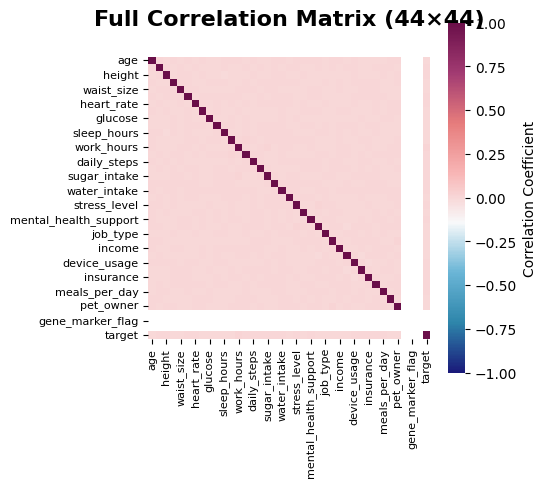

In [33]:
def save_all_correlation_components(corr_matrix, target_correlations, categories, target_column, df_shape):
    
    print("SAVING ALL COMPONENTS TO CORRELATION_HEATMAP FOLDER")
    
    # Save correlation matrix as CSV
    corr_matrix.to_csv('correlation_heatmap/correlation_matrix.csv')
    print("Saved: correlation_matrix.csv")
    
    # Save target correlations as CSV
    target_correlations.to_csv('correlation_heatmap/target_correlations.csv', header=['correlation'])
    print("Saved: target_correlations.csv")
    
    # Save detailed analysis to text file
    save_detailed_analysis_to_text(corr_matrix, target_correlations, categories, target_column, df_shape)
    
    # Save individual figures
    save_individual_figures(corr_matrix, target_correlations, target_column)
    
    print("\nAll components saved successfully to 'correlation_heatmap' folder!")

#Creates a text file summarize 
def save_detailed_analysis_to_text(corr_matrix, target_correlations, categories, target_column, df_shape):
    with open('correlation_heatmap/detailed_correlation_analysis.txt', 'w', encoding='utf-8') as f:
        
        # OVERALL DISTRIBUTION
        f.write("OVERALL DISTRIBUTION:\n")
        total_features = len(target_correlations)
        category_counts = {category: mask.sum() for category, mask in categories.items()}
        
        for category, count in category_counts.items():
            percentage = (count / total_features) * 100
            f.write(f"{category:35} : {count:2d} features ({percentage:5.1f}%)\n")
        
        # POSITIVE CORRELATIONS
        f.write("\n" + " POSITIVE CORRELATIONS (Ascending Order) ".center(70, '=') + "\n")
        positive_corrs = target_correlations[target_correlations > 0].sort_values(ascending=True)
        
        if len(positive_corrs) > 0:
            for category_name in ['Perfect Positive (r=1)', 'Strong Positive (0.8≤r<1)', 
                                'Moderate Positive (0.4≤r<0.8)', 'Weak Positive (0<r<0.4)']:
                category_mask = categories[category_name]
                category_features = target_correlations[category_mask].sort_values(ascending=True)
                
                if len(category_features) > 0:
                    f.write(f"\n{category_name}:\n")
                    f.write("-" * 50 + "\n")
                    for feature, corr in category_features.items():
                        f.write(f"  {feature:30} : {corr:+.6f}\n")
        
        # NEGATIVE CORRELATIONS
        f.write("\n" + " NEGATIVE CORRELATIONS (Ascending Order) ".center(70, '=') + "\n")
        negative_corrs = target_correlations[target_correlations < 0].sort_values(ascending=True)
        
        if len(negative_corrs) > 0:
            for category_name in ['Weak Negative (-0.4≤r<0)', 'Moderate Negative (-0.8≤r<-0.4)', 
                                'Strong Negative (-1<r<-0.8)', 'Perfect Negative (r=-1)']:
                category_mask = categories[category_name]
                category_features = target_correlations[category_mask].sort_values(ascending=True)
                
                if len(category_features) > 0:
                    f.write(f"\n{category_name}:\n")
                    f.write("-" * 50 + "\n")
                    for feature, corr in category_features.items():
                        f.write(f"  {feature:30} : {corr:+.6f}\n")
        
        # NO CORRELATION
        f.write("\n" + " NO CORRELATION (r=0) ".center(70, '=') + "\n")
        no_corr_features = target_correlations[categories['No Correlation (r=0)']]
        if len(no_corr_features) > 0:
            for feature, corr in no_corr_features.items():
                f.write(f"  {feature:30} : {corr:+.6f}\n")
        else:
            f.write("No features with exactly zero correlation.\n")
        
        f.write("\n" + " SUMMARY STATISTICS ".center(70, '=') + "\n")
        f.write("-" * 70 + "\n")
        f.write(f"Total features analyzed          : {total_features}\n")
        f.write(f"Features with positive correlation : {len(positive_corrs)}\n")
        f.write(f"Features with negative correlation : {len(negative_corrs)}\n")
        f.write(f"Features with no correlation (r=0) : {len(no_corr_features)}\n")
        f.write(f"Strongest positive correlation   : {target_correlations.max():.3f}\n")
        f.write(f"Strongest negative correlation   : {target_correlations.min():.3f}\n")
        
        # ALL CORRELATIONS WITH TARGET VARIABLE
        f.write("\n" + " ALL CORRELATIONS WITH TARGET VARIABLE ".center(80, '=') + "\n")
        target_correlations_sorted = corr_matrix[target_column].sort_values(ascending=False)
        for feature, corr in target_correlations_sorted.items():
            if feature != target_column:
                f.write(f"{feature:30} : {corr:+.6f}\n")
    
    print("Saved: detailed_correlation_analysis.txt")

def save_individual_figures(corr_matrix, target_correlations, target_column):
    
    # Custom colormap
    colors = [
        '#1a1a7a', '#2E86AB', '#6AB5D6', '#F8F9FA', 
        '#F8B5B5', '#E67C7C', '#A23B72', '#6A0F49'
    ]
    cmap = LinearSegmentedColormap.from_list('custom_correlation', colors, N=256)
    
    # Figure 1: Full correlation matrix
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, 
                annot=False,
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})
    plt.title('Full Correlation Matrix (44×44)\n', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.savefig('correlation_heatmap/full_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: full_correlation_matrix.png")
    
    # Figure 2: Target Correlations Bar Chart
    plt.figure(figsize=(40, 16))
    sorted_corrs = target_correlations.sort_values()
    
    plt.barh(range(len(sorted_corrs)), sorted_corrs.values, 
            color=[cmap((x+1)/2) for x in sorted_corrs.values], alpha=0.8)
    plt.yticks(range(len(sorted_corrs)), sorted_corrs.index, fontsize=6)
    plt.axvline(x=0, c='black', alpha=0.3)
    
    for i, (corr, label) in enumerate(zip(sorted_corrs.values, sorted_corrs.index)):
        plt.text(corr + (0.01 if corr>=0 else -0.02), i, f'{corr:.3f}', 
                ha='left' if corr>=0 else 'right', va='center', fontsize=6)
    
    plt.tight_layout()
    plt.savefig('correlation_heatmap/target_correlations_bar_chart.png', dpi=300)
    plt.close()
    print("Saved: target_correlations_bar_chart.png")
    
    # Figure 3: Correlation Strength Legend
    plt.figure(figsize=(12, 4))
    plt.axis('off')
    
    legend_elements = [
        Rectangle((0, 0), 1, 1, facecolor='#6A0F49', label='Perfect Positive (r=1)'),
        Rectangle((0, 0), 1, 1, facecolor='#A23B72', label='Strong Positive (0.8≤r<1)'),
        Rectangle((0, 0), 1, 1, facecolor='#E67C7C', label='Moderate Positive (0.4≤r<0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8B5B5', label='Weak Positive (0<r<0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8F9FA', label='No Correlation (r=0)'),
        Rectangle((0, 0), 1, 1, facecolor='#6AB5D6', label='Weak Negative (-0.4≤r<0)'),
        Rectangle((0, 0), 1, 1, facecolor='#2E86AB', label='Moderate Negative (-0.8≤r<-0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#1a1a7a', label='Strong Negative (-1<r<-0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#00004d', label='Perfect Negative (r=-1)')
    ]
    
    plt.legend(handles=legend_elements, loc='center', ncol=3, 
               fontsize=10, frameon=True, fancybox=True, 
               title='Correlation Strength Categories', title_fontsize=12)
    plt.title('Correlation Strength Legend', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_heatmap/correlation_strength_legend.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: correlation_strength_legend.png")
    
    # Figure 4: features correlation matrix
    plt.figure(figsize=(50, 50))
    features_to_display = corr_matrix.index[:45]
    display_matrix = corr_matrix.loc[features_to_display, features_to_display]
    
    sns.heatmap(display_matrix, 
                annot=True,
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                fmt='.3f',
                cbar_kws={'shrink': 0.8})
    plt.title('CORRELATION MATRIX\n', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap/all_features_correlation.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: all_features_correlation.png")


#Generating correlation heatmap
def plot_correlation_heatmap_with_categories(df_encoded_rounded, target_column='target'):
    
    # Calculate correlation matrix of all features
    corr_matrix = df_encoded_rounded.corr()

    #Calculate correlations with the target variable 
    target_correlations = corr_matrix[target_column].drop(target_column)
    
    # Define correlation strength categories
    categories = {
        'Perfect Positive (r=1)': (target_correlations == 1),
        'Strong Positive (0.8≤r<1)': (target_correlations >= 0.8) & (target_correlations < 1),
        'Moderate Positive (0.4≤r<0.8)': (target_correlations >= 0.4) & (target_correlations < 0.8),
        'Weak Positive (0<r<0.4)': (target_correlations > 0) & (target_correlations < 0.4),
        'No Correlation (r=0)': (target_correlations == 0),
        'Weak Negative (-0.4≤r<0)': (target_correlations >= -0.4) & (target_correlations < 0),
        'Moderate Negative (-0.8≤r<-0.4)': (target_correlations >= -0.8) & (target_correlations < -0.4),
        'Strong Negative (-1<r<-0.8)': (target_correlations > -1) & (target_correlations < -0.8),
        'Perfect Negative (r=-1)': (target_correlations == -1)
    }
    
    # Create a custom colormap based on the categories
    colors = [
        '#1a1a7a',  # Dark blue for strong negative
        '#2E86AB',  # Blue for moderate negative  
        '#6AB5D6',  # Light blue for weak negative
        '#F8F9FA',  # White for zero
        '#F8B5B5',  # Light red for weak positive
        '#E67C7C',  # Red for moderate positive
        '#A23B72',  # Dark red for strong positive
        '#6A0F49'   # Very dark red for perfect positive
    ]
    
    cmap = LinearSegmentedColormap.from_list('custom_correlation', colors, N=256)
    
    # Create the main visualization
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.6])
    
    # Plot 1: Full correlation matrix
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(corr_matrix, 
                annot=False,  
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                ax=ax1)
    ax1.set_title('Full Correlation Matrix (44×44)\n', fontsize=16, fontweight='bold')
    ax1.tick_params(axis='x', rotation=90, labelsize=8)
    ax1.tick_params(axis='y', rotation=0, labelsize=8)
    
    # Display correlation matrix
    display_correlation_matrix(corr_matrix, target_column)

    save_all_correlation_components(corr_matrix, target_correlations, categories, target_column, df_encoded_rounded.shape)
    
    return corr_matrix, target_correlations, categories


def display_correlation_matrix(corr_matrix, target_column):
    
    print(f"\n{' CORRELATION MATRIX (with all features) ':=^80}")
    
    # Display target correlations with features
    features_to_display = corr_matrix.index[:45]  
    display_matrix = corr_matrix.loc[features_to_display, features_to_display]
    
    # Format for better readability
    display_matrix_styled = display_matrix.style \
        .background_gradient(cmap='RdBu_r', vmin=-1, vmax=1) \
        .format('{:.3f}') \
        .set_caption(f'Correlation Matrix (First 10 features + {target_column})')
    
    display(display_matrix_styled)
    
    # Also show all correlations with the target variable
    print(f"\n{' ALL CORRELATIONS WITH TARGET VARIABLE '}")
    target_correlations_sorted = corr_matrix[target_column].sort_values(ascending=False)
    
    # Create a styled series for display
    target_corr_styled = target_correlations_sorted.to_frame() \
        .style.background_gradient(cmap='RdBu_r', vmin=-1, vmax=1) \
        .format('{:.3f}') \
        .set_caption(f'All Correlations with {target_column} (Sorted)')
    
    display(target_corr_styled)


corr_matrix, target_correlations, categories = plot_correlation_heatmap_with_categories(df_encoded_rounded, 'target')

positive_corrs = target_correlations[target_correlations > 0].sort_values(ascending=True)
corr_matrix = df_encoded_rounded.corr()


In [34]:
pos_corrs_vars = positive_corrs
print(pos_corrs_vars)

heart_rate               0.000078
calorie_intake           0.000181
sugar_intake             0.000213
sunlight_exposure        0.000419
stress_level             0.000767
insurance                0.000904
gender                   0.000916
device_usage             0.001230
physical_activity        0.001328
height                   0.001400
smoking_level            0.001578
mental_health_support    0.001678
water_intake             0.001974
blood_pressure           0.002764
meals_per_day            0.002914
healthcare_access        0.003740
daily_steps              0.004856
work_hours               0.011073
Name: target, dtype: float64


In [35]:
#Classifying variables with positive correlations into categorical and numerical
def classify_variables(positive_corrs, df):
    categorical_vars = []
    numerical_vars = []
    
    for variable in positive_corrs.index:
        if variable in df.columns:
            # Check original data type before encoding
            if df[variable].dtype in ['object', 'category']:
                categorical_vars.append(variable)
            else:
                numerical_vars.append(variable)
    
    return categorical_vars, numerical_vars

categorical_vars, numerical_vars = classify_variables(positive_corrs, df)

In [36]:
print("Categorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)
print(f"Categorical variables count: {len(categorical_vars)}")
print(f"Numerical variables count: {len(numerical_vars)}")


Categorical variables: ['sunlight_exposure', 'insurance', 'gender', 'device_usage', 'smoking_level', 'mental_health_support', 'healthcare_access']
Numerical variables: ['heart_rate', 'calorie_intake', 'sugar_intake', 'stress_level', 'physical_activity', 'height', 'water_intake', 'blood_pressure', 'meals_per_day', 'daily_steps', 'work_hours']
Categorical variables count: 7
Numerical variables count: 11


In [38]:
#Drawing pie charts for each categorical variable
output_folder = r"pie_charts"

for col in categorical_vars:
    plt.figure(figsize=(8, 8))
    
    counts = df[col].value_counts()
    
    # Unpack the return values of plt.pie
    wedges, texts, autotexts = plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.8
    )
    
    # Style percentages inside slices
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    # Add title
    plt.title(f"Pie Chart of {col}", fontsize=14)
    
    # Place legend outside the pie
    plt.legend(
        wedges, 
        counts.index, 
        title="Categories", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    # Save figure
    save_path = os.path.join(output_folder, f"{col}_pie.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

print(f"Pie charts saved in: {os.path.abspath(output_folder)}")


Pie charts saved in: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\pie_charts


In [67]:
#Drawing box plots per numerical variable with positive correlations
# Output folder
output_folder = r"box_plots"

for col in numerical_vars:
    data = df_encoded_rounded[col].dropna()
    
    # Calculate quartiles and fences
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)  # Median
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Inner fences
    lower_inner = Q1 - 1.5 * IQR
    upper_inner = Q3 + 1.5 * IQR

    # Outer fences
    lower_outer = Q1 - 3 * IQR
    upper_outer = Q3 + 3 * IQR

    # Calculate mean and mode
    mean_val = np.mean(data)
    mode_vals = pd.Series(data).mode()
    mode_val = mode_vals[0] if not mode_vals.empty else np.nan
    skew_val = skew(data)

    if skew_val > 0.5:
        dist_type = "Positively Skewed"
    elif skew_val < -0.5:
        dist_type = "Negatively Skewed"
    else:
        dist_type = "Approximately Normal"

    # Create figure
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data, color="skyblue", showfliers=True)

    # Add reference lines
    plt.axvline(Q1, color='blue', linestyle='--', label=f"Q1 = {Q1:.2f}")
    plt.axvline(Q2, color='green', linestyle='--', label=f"Median = {Q2:.2f}")
    plt.axvline(Q3, color='blue', linestyle='--', label=f"Q3 = {Q3:.2f}")
    plt.axvline(lower_inner, color='orange', linestyle=':', label=f"Lower Inner Fence = {lower_inner:.2f}")
    plt.axvline(upper_inner, color='orange', linestyle=':', label=f"Upper Inner Fence = {upper_inner:.2f}")
    plt.axvline(lower_outer, color='red', linestyle=':', label=f"Lower Outer Fence = {lower_outer:.2f}")
    plt.axvline(upper_outer, color='red', linestyle=':', label=f"Upper Outer Fence = {upper_outer:.2f}")
    plt.axvline(mean_val, color='purple', linestyle='-', label=f"Mean = {mean_val:.2f}")
    plt.axvline(mode_val, color='brown', linestyle='-', label=f"Mode = {mode_val:.2f}")

    # Titles and legend
    plt.title(f"Box Plot of {col}", fontsize=14)
    plt.legend(loc="best", fontsize=8)

    # Save figure
    save_path = os.path.join(output_folder, f"{col}_box.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

    print(f"Skewness={skew_val:.3f} -> {dist_type}")

print(f"Box plots saved in: {os.path.abspath(output_folder)}")

Skewness=-0.030 -> Approximately Normal
Skewness=0.002 -> Approximately Normal
Skewness=0.009 -> Approximately Normal
Skewness=-0.000 -> Approximately Normal
Skewness=0.242 -> Approximately Normal
Skewness=-0.001 -> Approximately Normal
Skewness=0.039 -> Approximately Normal
Skewness=-0.000 -> Approximately Normal
Skewness=0.001 -> Approximately Normal
Skewness=-0.001 -> Approximately Normal
Skewness=-0.001 -> Approximately Normal
Box plots saved in: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\box_plots


In [45]:
# Comparing categorical variables with the target variable.
def generate_formatted_two_way_tables(df, categorical_vars, target_var, output_file='two_way_tables.txt'):
    
    with open(output_file, 'w') as f:
        f.write("TWO-WAY FREQUENCY TABLES REPORT\n")
        
        results = {}
        
        for i, cat_var in enumerate(categorical_vars, 1):
            if cat_var in df.columns and cat_var != target_var:
                f.write(f"\nTABLE {i}: {cat_var.upper()} vs {target_var.upper()}\n")
                f.write("-" * 40 + "\n")
                
                # Frequency table
                freq_table = pd.crosstab(df[cat_var], df[target_var], margins=True)
                f.write("FREQUENCY COUNTS:\n")
                
                # Convert table to string with better formatting
                table_str = str(freq_table)
                f.write(table_str)
                f.write("\n\n")
                
                # Percentage table
                pct_table = pd.crosstab(df[cat_var], df[target_var], normalize='columns') * 100
                f.write("COLOMUN PERCENTAGES:\n")
                pct_str = str(pct_table.round(2))
                f.write(pct_str)
                f.write("\n" + "-" * 40 + "\n\n")
                
                results[cat_var] = {
                    'frequency_table': freq_table,
                    'percentage_table': pct_table
                }
    
    print(f"Formatted two-way tables saved to: {output_file}")
    return results

results = generate_formatted_two_way_tables(df, categorical_vars, 'target', 'two_way_tables.txt')

Formatted two-way tables saved to: two_way_tables.txt


In [66]:
# Comparing numerical variables with the target variable.
target_var = "target"

results = []

for col in numerical_vars:
    if col != target_var and col in df_encoded_rounded.columns:
        for category in df_encoded_rounded[target_var].unique():
            
            # Filter data for target class
            subset = df_encoded_rounded[df_encoded_rounded[target_var] == category][col].dropna()
            
            if len(subset) == 0:
                continue
            
            mean_val = np.mean(subset)
            median_val = np.median(subset)
            try:
                mode_val = stats.mode(subset, keepdims=True).mode[0]
            except:
                mode_val = subset.value_counts().index[0]
            
            skewness = stats.skew(subset)
    
            if skewness > 0.5:
                skew_type = "Positively skewed (Right-skewed)"
            elif skewness < -0.5:
                skew_type = "Negatively skewed (Left-skewed)"
            else:
                skew_type = "Approximately normal distribution"
            
            results.append({
                "Variable": col,
                "Target Category": category,
                "Mean": round(mean_val, 3),
                "Median": round(median_val, 3),
                "Mode": round(mode_val, 3),
                "Skewness": round(skewness, 3),
                "Distribution Type": skew_type
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\nDescriptive Statistics by Class:")
print(results_df.to_string(index=False))

output_path = r"statistics_by_target.txt"
os.makedirs(os.path.dirname(output_path) or ".", exist_ok=True)


Descriptive Statistics by Class:
         Variable  Target Category     Mean   Median     Mode  Skewness                 Distribution Type
       heart_rate                1   74.979   75.046   75.046    -0.025 Approximately normal distribution
       heart_rate                0   74.978   75.046   75.046    -0.040 Approximately normal distribution
   calorie_intake                1 2201.504 2200.595 1271.261    -0.001 Approximately normal distribution
   calorie_intake                0 2201.348 2201.943 3134.216     0.009 Approximately normal distribution
     sugar_intake                1   60.054   60.037  106.301     0.010 Approximately normal distribution
     sugar_intake                0   60.045   60.068   13.905     0.005 Approximately normal distribution
     stress_level                1    4.993    5.000    6.000    -0.001 Approximately normal distribution
     stress_level                0    4.988    5.000    4.000     0.001 Approximately normal distribution
physical_act